In [1]:
#!pip install kaggle-environments
#!pip install chardet
#!pip install charset-normalizer
#!pip install gym
#!pip install tqdm
#!pip install -U matplotlib

In [1]:
from kaggle_environments import make

import numpy as np
import gym


from Scripts.MCTS import agent_mcts
from Scripts.Deep_Q_Learning import DQN
import matplotlib.pyplot as plt

from Scripts.test_model import test_agent, new_testing

from Scripts.new_training import train_adversial_agent, save_agent,load_agent, train_agent
from tqdm import tqdm

Loading environment lux_ai_s2 failed: No module named 'vec_noise'


# 0. Initialisating the environment

In [2]:
cols = 7
rows = 6
env = make("connectx", configuration={"rows":rows, "columns":cols})

In [3]:
LOAD_MODEL_agent1 = False
LOAD_MODEL_agent2 = False


PATH_TO_LOAD = "models/"
NAME_AGENT_1 = "1v2_ep20.pt"
NAME_AGENT_2 = "2v1_ep20.pt"


if(LOAD_MODEL_agent1):
    agent1 = load_agent(PATH_TO_LOAD+NAME_AGENT_1)
else :
    agent1 = DQN()


if(LOAD_MODEL_agent2):
    agent2 = load_agent(PATH_TO_LOAD+NAME_AGENT_2)
else:
    agent2 = DQN()

# 1. Training against Random

In [4]:
RANDOM_EPOCHS = 100
NB_GAMES_TEST = 10

In [6]:
agent1 = train_agent(env,agent1,env.agents["random"],n_player=1,epochs=RANDOM_EPOCHS,display_info=True, save=False)


In [7]:
current_history_random = new_testing(env,agent1,env.agents["random"],n_player=1,nb_games=NB_GAMES_TEST)
current_history_MCTS = new_testing(env,agent1,agent_mcts,n_player=1,nb_games=NB_GAMES_TEST)
current_history_negamax = new_testing(env,agent1,env.agents["negamax"],n_player =1, nb_games=NB_GAMES_TEST)

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been played ! 

The 100 th game has been pla

In [8]:
print('random : ',current_history_random)
print('negamax :',current_history_negamax)
print('MCTS :',current_history_MCTS)

random :  {1: 8, -1: 1, None: 0, 0: 0}
negamax : {1: 0, -1: 9, None: 0, 0: 0}
MCTS : {1: 0, -1: 9, None: 0, 0: 0}


# 2. Adversarial training

In [4]:
ADVERSARIAL_EPOCHS = 100
NB_SWITCH = 10

FOLLOW_TRAINING = True
NB_GAMES_TEST = 10

history_random = []
history_MCTS = []
history_negamax = []

In [5]:
for i in range(NB_SWITCH):
    agent1 = train_adversial_agent(env,agent1, agent2,n_player=1,epochs=ADVERSARIAL_EPOCHS,display_info=True)
    agent2 = train_adversial_agent(env,agent2, agent1 ,n_player=2,epochs=ADVERSARIAL_EPOCHS,display_info=True)
    if FOLLOW_TRAINING:
        current_history_random = new_testing(env,agent1,env.agents["random"],n_player=1,nb_games=NB_GAMES_TEST)
        current_history_MCTS = new_testing(env,agent1,agent_mcts,n_player=1,nb_games=NB_GAMES_TEST)
        current_history_negamax = new_testing(env,agent1,env.agents["negamax"],n_player =1, nb_games=NB_GAMES_TEST)

        history_random.append(current_history_random[1]/NB_GAMES_TEST*100)
        history_MCTS.append(current_history_MCTS[1]/NB_GAMES_TEST*100)
        history_negamax.append(current_history_negamax[1]/NB_GAMES_TEST*100)



Episode 50 Average Reward 0.02576133646263675 Nb Win 13 Epsilon 0.1
Episode 50 Average Reward 0.12557460523145406 Nb Win 29 Epsilon 0.1
Episode 50 Average Reward -0.012670770958376588 Nb Win 25 Epsilon 0.1
Episode 50 Average Reward 0.11279310504375546 Nb Win 36 Epsilon 0.1
Episode 50 Average Reward 0.1704778573743695 Nb Win 48 Epsilon 0.1
Episode 50 Average Reward 0.19930261586762055 Nb Win 50 Epsilon 0.1
Episode 50 Average Reward 0.16959719326464018 Nb Win 27 Epsilon 0.1
Episode 50 Average Reward 0.38742048900000015 Nb Win 50 Epsilon 0.1
Episode 50 Average Reward 0.32343086291568035 Nb Win 47 Epsilon 0.1
Episode 50 Average Reward 0.38742048900000015 Nb Win 50 Epsilon 0.1
Episode 50 Average Reward 0.3486784401000002 Nb Win 50 Epsilon 0.1
Episode 50 Average Reward 0.38742048900000015 Nb Win 50 Epsilon 0.1
Episode 50 Average Reward 0.3486784401000002 Nb Win 50 Epsilon 0.1
Episode 50 Average Reward 0.315378988828453 Nb Win 48 Epsilon 0.1
Episode 50 Average Reward 0.3096285446053984 Nb Win

In [8]:
if FOLLOW_TRAINING:
    print('random :', current_history_random)
    print('negamax :',current_history_negamax)
    print('MCTS :', current_history_MCTS)


random : {1: 6, -1: 3, None: 0, 0: 0}
negamax : {1: 0, -1: 9, None: 0, 0: 0}
MCTS : {1: 0, -1: 9, None: 0, 0: 0}


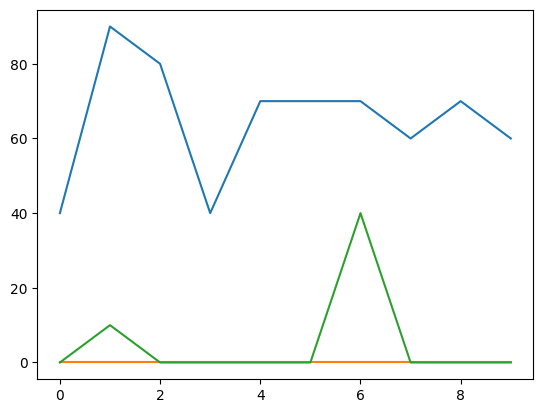

In [9]:
if FOLLOW_TRAINING:
    plt.plot(history_random)
    plt.plot(history_MCTS)
    plt.plot(history_negamax)
plt.show()

# 3. Testing Agents

In [14]:
NB_GAMES_TEST = 100

### 3.1 Against random

In [16]:
history_random = new_testing(env,agent1,env.agents["random"],n_player=1,nb_games=NB_GAMES_TEST)
print(history_random)

{1: 53, -1: 46, None: 0, 0: 0}


### 3.2 Against MCTS

In [ ]:
history_MCTS = new_testing(env,agent1,agent_mcts,n_player=1,nb_games=NB_GAMES_TEST)
plt.plot(history_MCTS)

### 3.3 Against MCTS

In [ ]:
history_negamax = new_testing(env,agent1,env.agents["negamax"],n_player =1, nb_games=NB_GAMES_TEST)
plt.plot(history_negamax)

# 4. Saving Agents

In [ ]:
SAVE = True
PATH_TO_SAVE = "models/"

NAME1 = "1v2_ep"+ str(NB_SWITCH*ADVERSARIAL_EPOCHS)
NAME2 = "2v1_ep"+ str(NB_SWITCH*ADVERSARIAL_EPOCHS)

In [ ]:
if SAVE :
    save_agent(agent1, path_to_save=PATH_TO_SAVE, name=NAME1, epochs=NB_SWITCH*ADVERSARIAL_EPOCHS)
    save_agent(agent2, path_to_save=PATH_TO_SAVE, name=NAME2, epochs=NB_SWITCH*ADVERSARIAL_EPOCHS)